# Problem 1 - Model Predictive Control

Creates the Quadrotor object and loads in the animation code.

**Re-run this block anytime you make change to `quadrotor.py`.**

In [3]:
%matplotlib inline

"""
Simulate quadrotor
"""

import numpy as np
from math import sin, cos, pi
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import importlib

from quad_sim_pendulum import simulate_quadrotor

# Need to reload the module to use the latest code
import quadrotor_with_pendulum
importlib.reload(quadrotor_with_pendulum)
from quadrotor_with_pendulum import QuadrotorPendulum
from animation import Animation
from obstacles import Obstacles

# Weights of LQR cost
R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
tf = 10

# Construct our quadrotor controller 
quadrotor = QuadrotorPendulum(Q, R, Qf, input_max=30)
obstacles = Obstacles("./configs/world.yaml")

## Simulate the quadrotor using MPC as the controller


In [4]:
# Set quadrotor's initial state and simulate
x0 = np.array([0.5, 0.5, 0, 0, 1, 1, 0, 0])
x, u, t = simulate_quadrotor(x0, tf, quadrotor)


anime = Animation(obstacles, quadrotor, tf = tf)
anime.set_trajectory(x)
print('x = ', x, '\n')
print('u =', u)

anim, fig = anime.animate()
plt.close()
anim

x =  [[ 5.00000000e-01  5.00000000e-01  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.10000000e-01  5.10000000e-01  0.00000000e+00 ...  9.90309724e-01
   8.85516808e-02  0.00000000e+00]
 [ 5.20000000e-01  5.19903097e-01  8.85516808e-04 ...  9.80610654e-01
   1.58122771e-01  0.00000000e+00]
 ...
 [-2.35310235e-03  6.52909966e-02 -1.85813313e-03 ... -5.33052704e-02
   1.17133715e-03  1.46727827e-03]
 [-2.37351190e-03  6.47579439e-02 -1.84641976e-03 ... -5.34249222e-02
   1.27164014e-03  1.57254955e-03]
 [-2.39220589e-03  6.42236946e-02 -1.83370336e-03 ... -5.35401399e-02
   1.36997439e-03  1.67560848e-03]] 

u = [[ 0.          0.        ]
 [13.25128631 13.84163085]
 [13.31323582 13.77704308]
 ...
 [14.9810657  14.98174725]
 [14.98173997 14.98240866]
 [14.98241151 14.98306707]]



...planning...
Found plan at elapsed time: 16.594203 s
Tree size: 30
ETA: 153.2 s


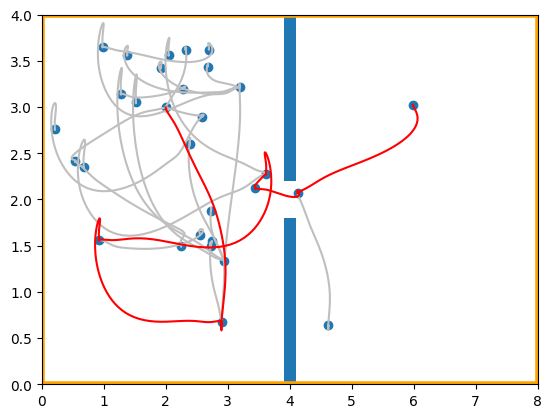

In [2]:
from kinodynamic_rrt import KinodtnamicRRT
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import importlib

from quad_sim_pendulum import simulate_quadrotor

# Need to reload the module to use the latest code
import quadrotor_with_pendulum
importlib.reload(quadrotor_with_pendulum)
from quadrotor_with_pendulum import QuadrotorPendulum
from animation import Animation
from obstacles import Obstacles

import numpy as np

# Weights of LQR cost
R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
tf = 10

# Construct our quadrotor controller 
quadrotor = QuadrotorPendulum(Q, R, Qf, input_max=30)
obstacles = Obstacles("./configs/world.yaml")

rrt = KinodtnamicRRT("./configs/lqrrt.yaml", obstacles, quadrotor)
x0 = np.array([2, 3, 0, 0, 0, 0, 0, 0])
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
t, x, u = rrt.find_trajectory(x0, xf)

np.save("./output/t.npy", t)
np.save("./output/x.npy", x)
np.save("./output/u.npy", u)

## Simulate the quadrotor using LQR as the controller (Already implemented)

In [3]:
# Set quadrotor's initial state and simulate
x0 = np.array([0.5, 0.5, 0, 0, 1, 1, 0, 0])
x, u, t = simulate_quadrotor(x0, tf, quadrotor, False)

obstacles = Obstacles("./configs/world.yaml")
anime = Animation(obstacles, quadrotor, tf = tf)
anime.set_trajectory(x)
print('x = ', x, '\n')
print('u =', u)

anim, fig = anime.animate()
plt.close()
anim

x =  [[ 5.00000000e-01  5.00000000e-01  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.10000000e-01  5.10000000e-01  0.00000000e+00 ...  9.74647708e-01
   9.20700339e-01  0.00000000e+00]
 [ 5.20000000e-01  5.19746477e-01  9.20700339e-03 ...  9.49600118e-01
   1.53100467e+00  0.00000000e+00]
 ...
 [ 2.99876632e-05 -1.08764256e-03 -5.15517110e-05 ...  5.27759633e-03
  -3.02963116e-05 -8.42575118e-06]
 [ 2.77757776e-05 -1.03486660e-03 -5.18546741e-05 ...  5.19934757e-03
  -2.48342032e-05 -3.02747608e-06]
 [ 2.56082057e-05 -9.82873122e-04 -5.21030161e-05 ...  5.12171263e-03
  -1.95188959e-05  2.20693032e-06]] 

u = [[ 0.          0.        ]
 [ 8.12815503 14.26615729]
 [ 9.20851381 13.27720932]
 ...
 [14.98815205 14.98818944]
 [14.98824449 14.98828091]
 [14.98833705 14.98837249]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc24b42c-2384-48c3-b1e2-6f6c0205f5f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>